Global Power Plant Database

Problem Statement:
    
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('database_IND.csv')

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
df.shape

(907, 27)

In [7]:
#checking null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

we will drop other_fuel2, other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh beacuse alomst all vales are null

In [8]:
df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','year_of_capacity_data','url','country'], axis=1, inplace=True)

In [9]:
df.shape

(907, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_long            907 non-null    object 
 1   name                    907 non-null    object 
 2   gppd_idnr               907 non-null    object 
 3   capacity_mw             907 non-null    float64
 4   latitude                861 non-null    float64
 5   longitude               861 non-null    float64
 6   primary_fuel            907 non-null    object 
 7   other_fuel1             198 non-null    object 
 8   commissioning_year      527 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  907 non-null    object 
 11  geolocation_source      888 non-null    object 
 12  generation_gwh_2014     398 non-null    float64
 13  generation_gwh_2015     422 non-null    float64
 14  generation_gwh_2016     434 non-null    fl

In [11]:
df

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#checking null values
df.isnull().sum()

country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

<AxesSubplot:>

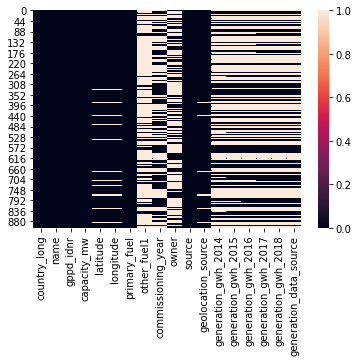

In [13]:
#checking null values using heatmap
sns.heatmap(df.isnull())

In [14]:
df.dtypes

country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
geolocation_source         object
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [15]:
# filling the missing values for numerical terms using mean

df['capacity_mw']=df['capacity_mw'].fillna(df['capacity_mw'].mean())
#df['latitude']=df['latitude'].fillna(df['latitude'].mean())
#df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

In [16]:
# Filling the missing values for categorical terms using mode

df['latitude']=df['latitude'].fillna(df['latitude'].mode()[0])
df['longitude']=df['longitude'].fillna(df['longitude'].mode()[0])
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['owner']=df['owner'].fillna(df['owner'].mode()[0])
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['generation_data_source']=df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])
#df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])

In [17]:
df

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2015.0,AES,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Acc Acc ltd,Central Electricity Authority,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,2015.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
904,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,2015.0,Acc Acc ltd,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
905,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,2015.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority


In [18]:
#checking null values
df.isnull().sum()

country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

<AxesSubplot:>

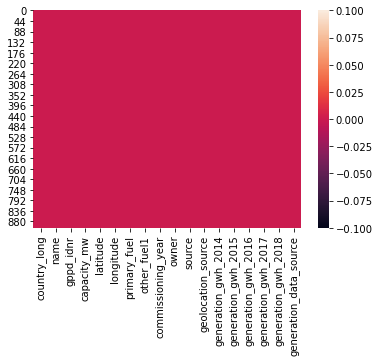

In [19]:
#checking null values using heatmap
sns.heatmap(df.isnull())

we can see no null values left as of now 

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

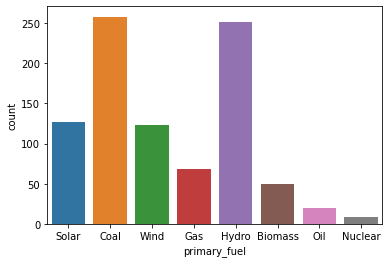

In [20]:
#plt.figure(figsize =(40,40))
sns.countplot(df['primary_fuel'])

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

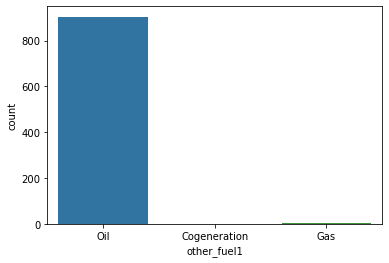

In [21]:
sns.countplot(df['other_fuel1'])

<AxesSubplot:xlabel='commissioning_year', ylabel='count'>

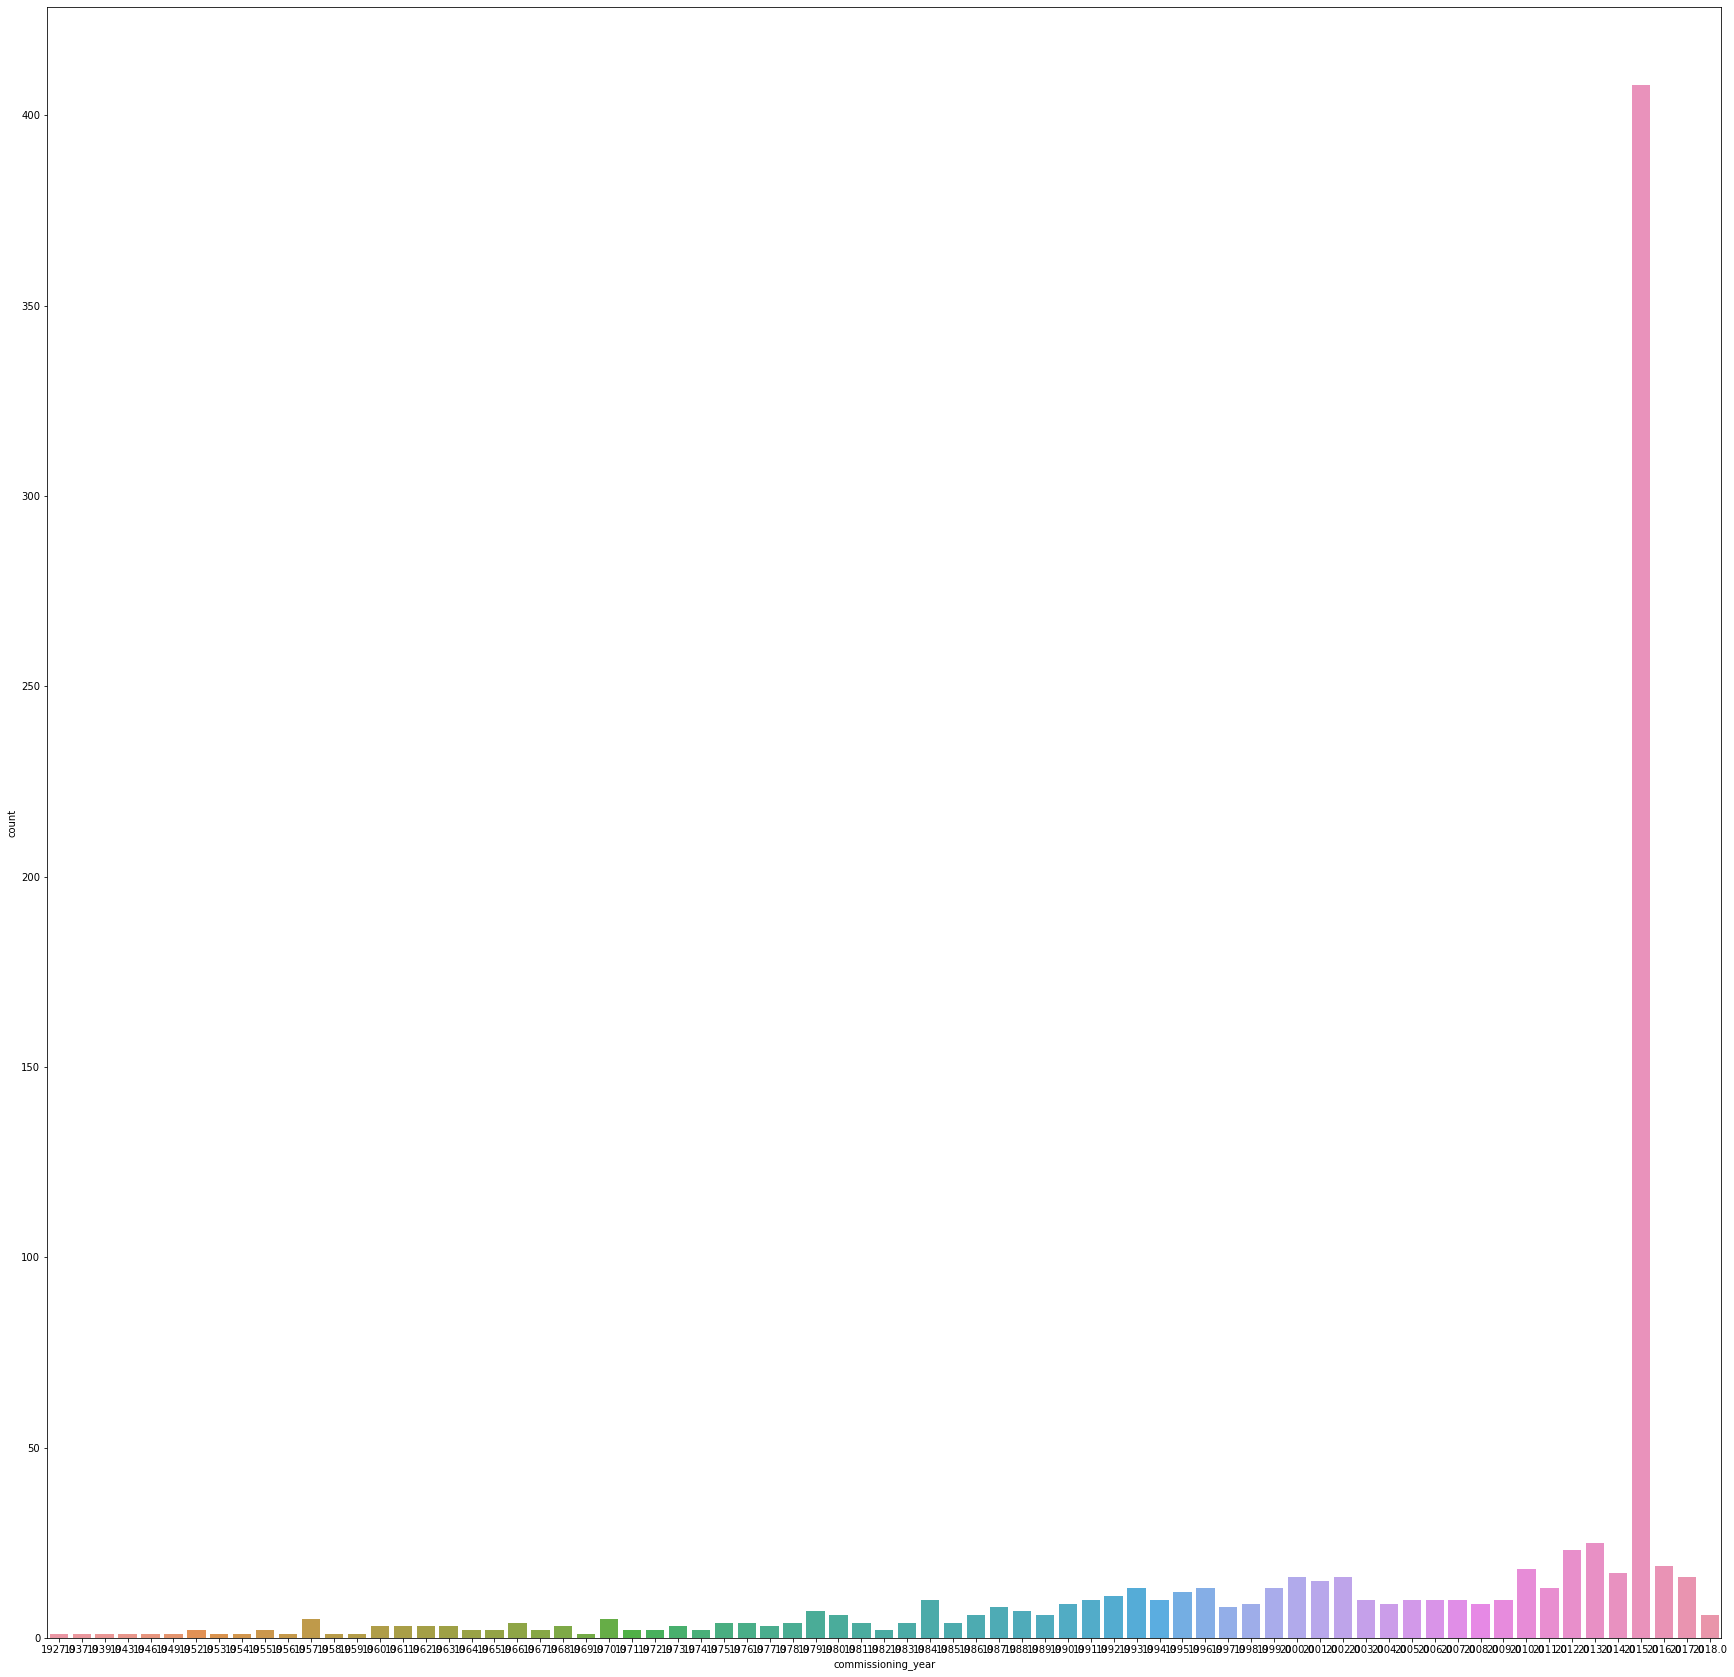

In [22]:
plt.figure(figsize =(30,30))
sns.countplot(df['commissioning_year'])

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

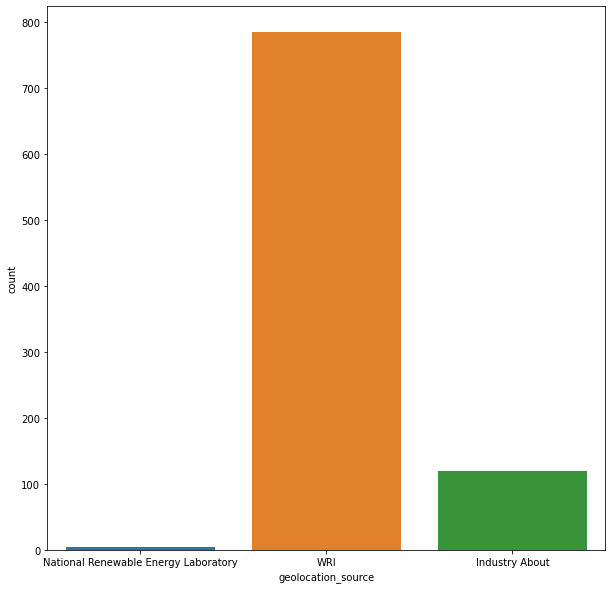

In [23]:
plt.figure(figsize =(10,10))
sns.countplot(df['geolocation_source'])

<AxesSubplot:xlabel='generation_data_source', ylabel='count'>

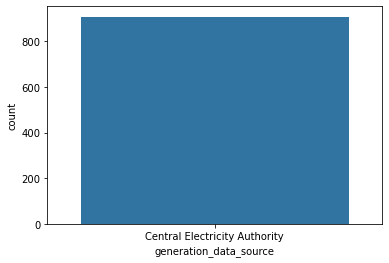

In [24]:
sns.countplot(df['generation_data_source'])

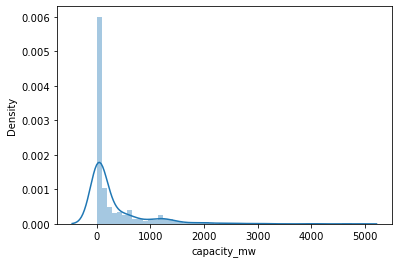

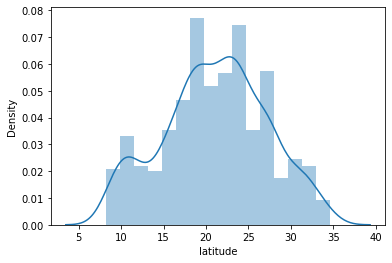

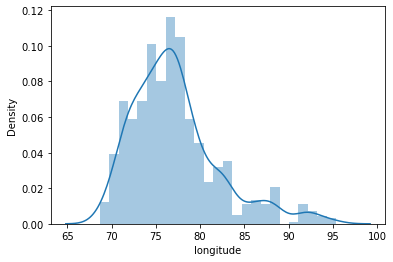

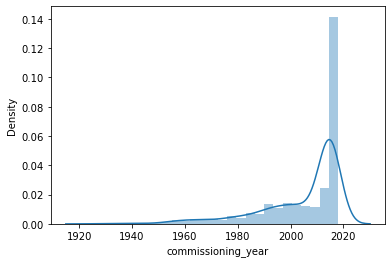

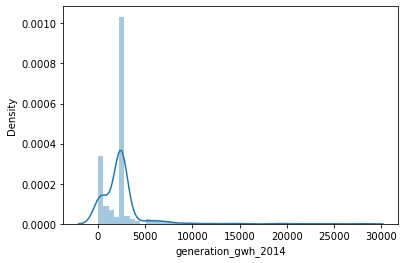

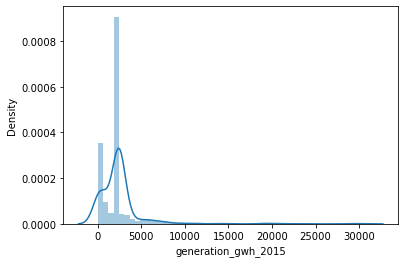

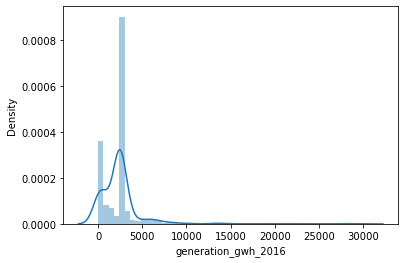

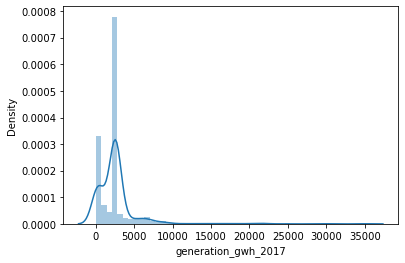

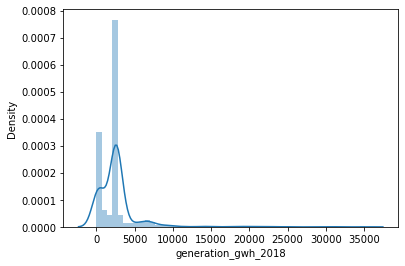

In [25]:
# checking that data is normally distributed or not
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

capacity_mw               AxesSubplot(0.125,0.657941;0.133621x0.222059)
latitude               AxesSubplot(0.285345,0.657941;0.133621x0.222059)
longitude               AxesSubplot(0.44569,0.657941;0.133621x0.222059)
commissioning_year     AxesSubplot(0.606034,0.657941;0.133621x0.222059)
generation_gwh_2014    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
generation_gwh_2015       AxesSubplot(0.125,0.391471;0.133621x0.222059)
generation_gwh_2016    AxesSubplot(0.285345,0.391471;0.133621x0.222059)
generation_gwh_2017     AxesSubplot(0.44569,0.391471;0.133621x0.222059)
generation_gwh_2018    AxesSubplot(0.606034,0.391471;0.133621x0.222059)
dtype: object

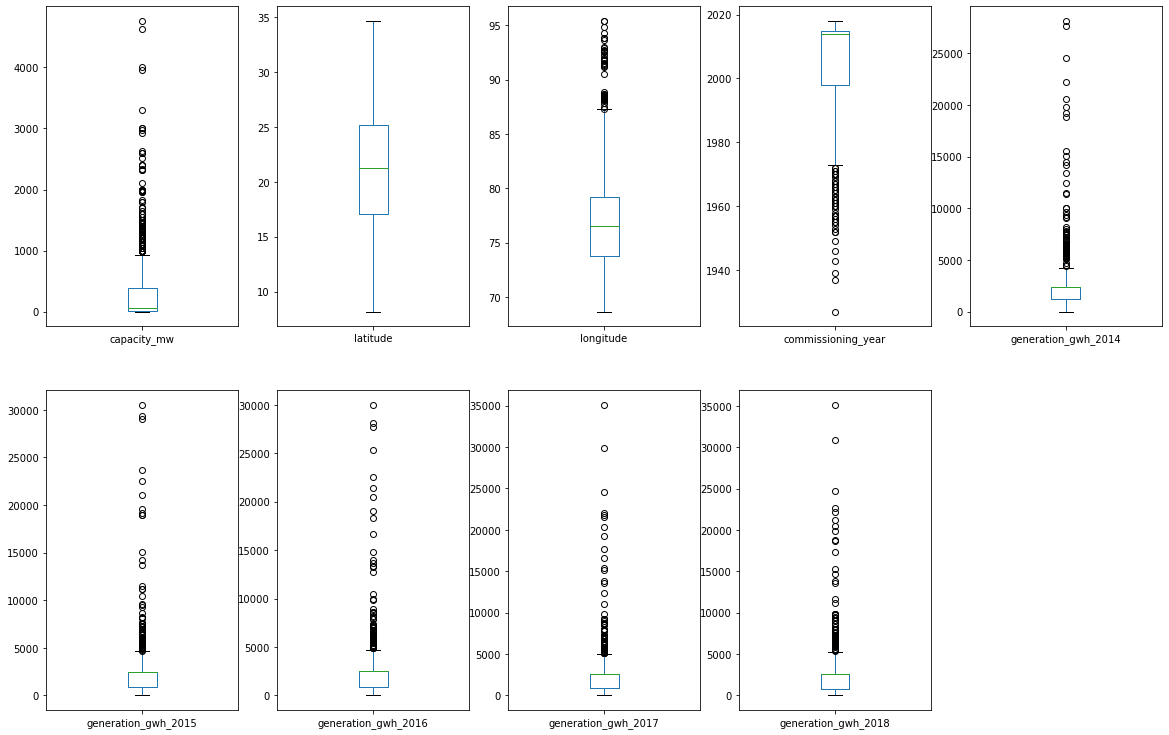

In [26]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(20,20))

almost all columns is having outliers

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_gwh_2018'}>]],
      dtype=object)

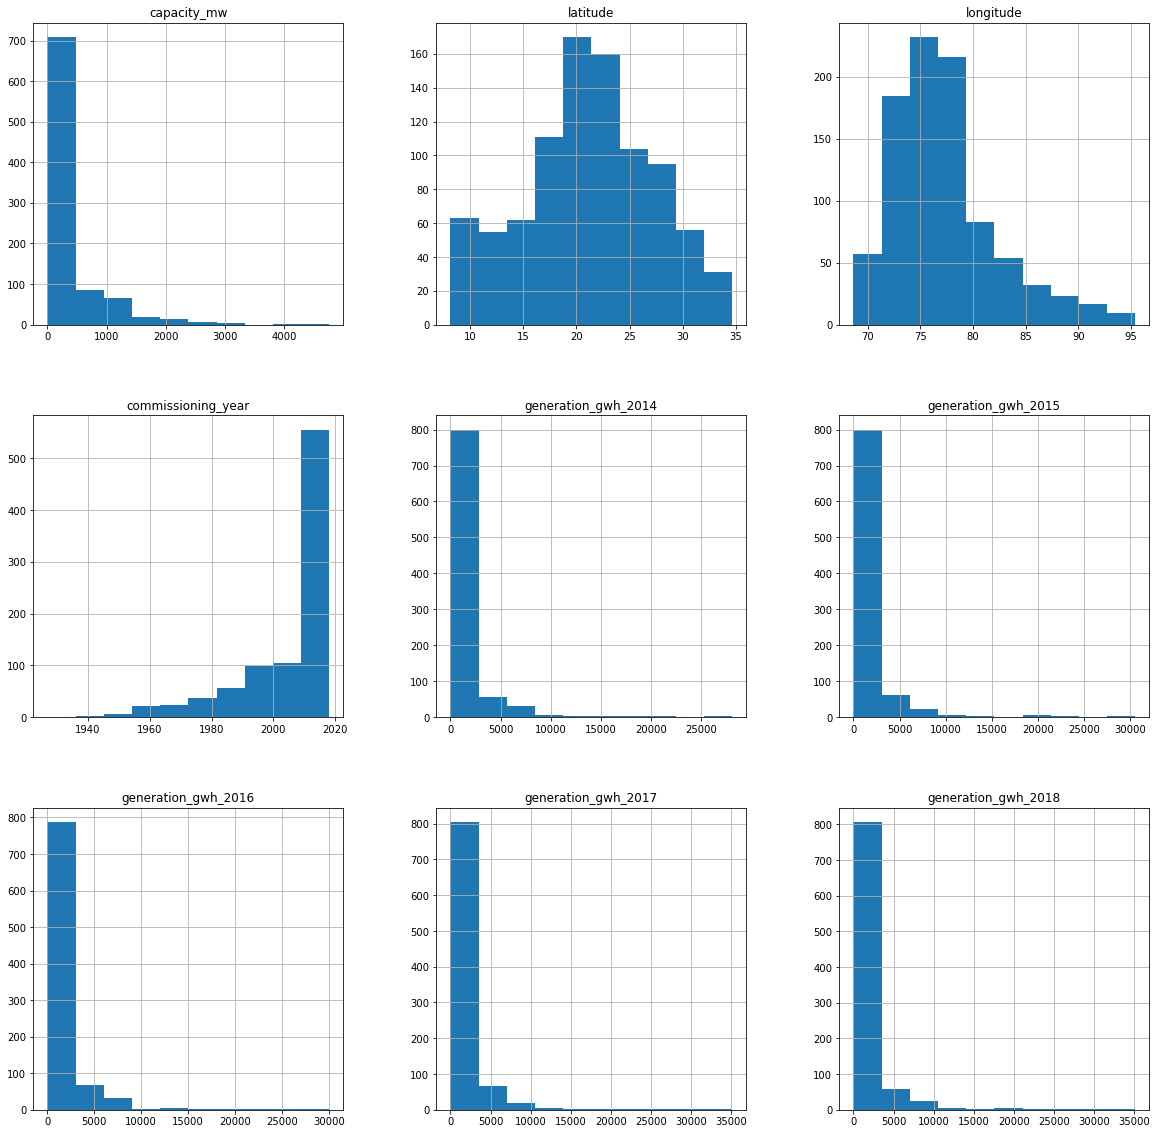

In [27]:
df.hist(figsize=(20,20))

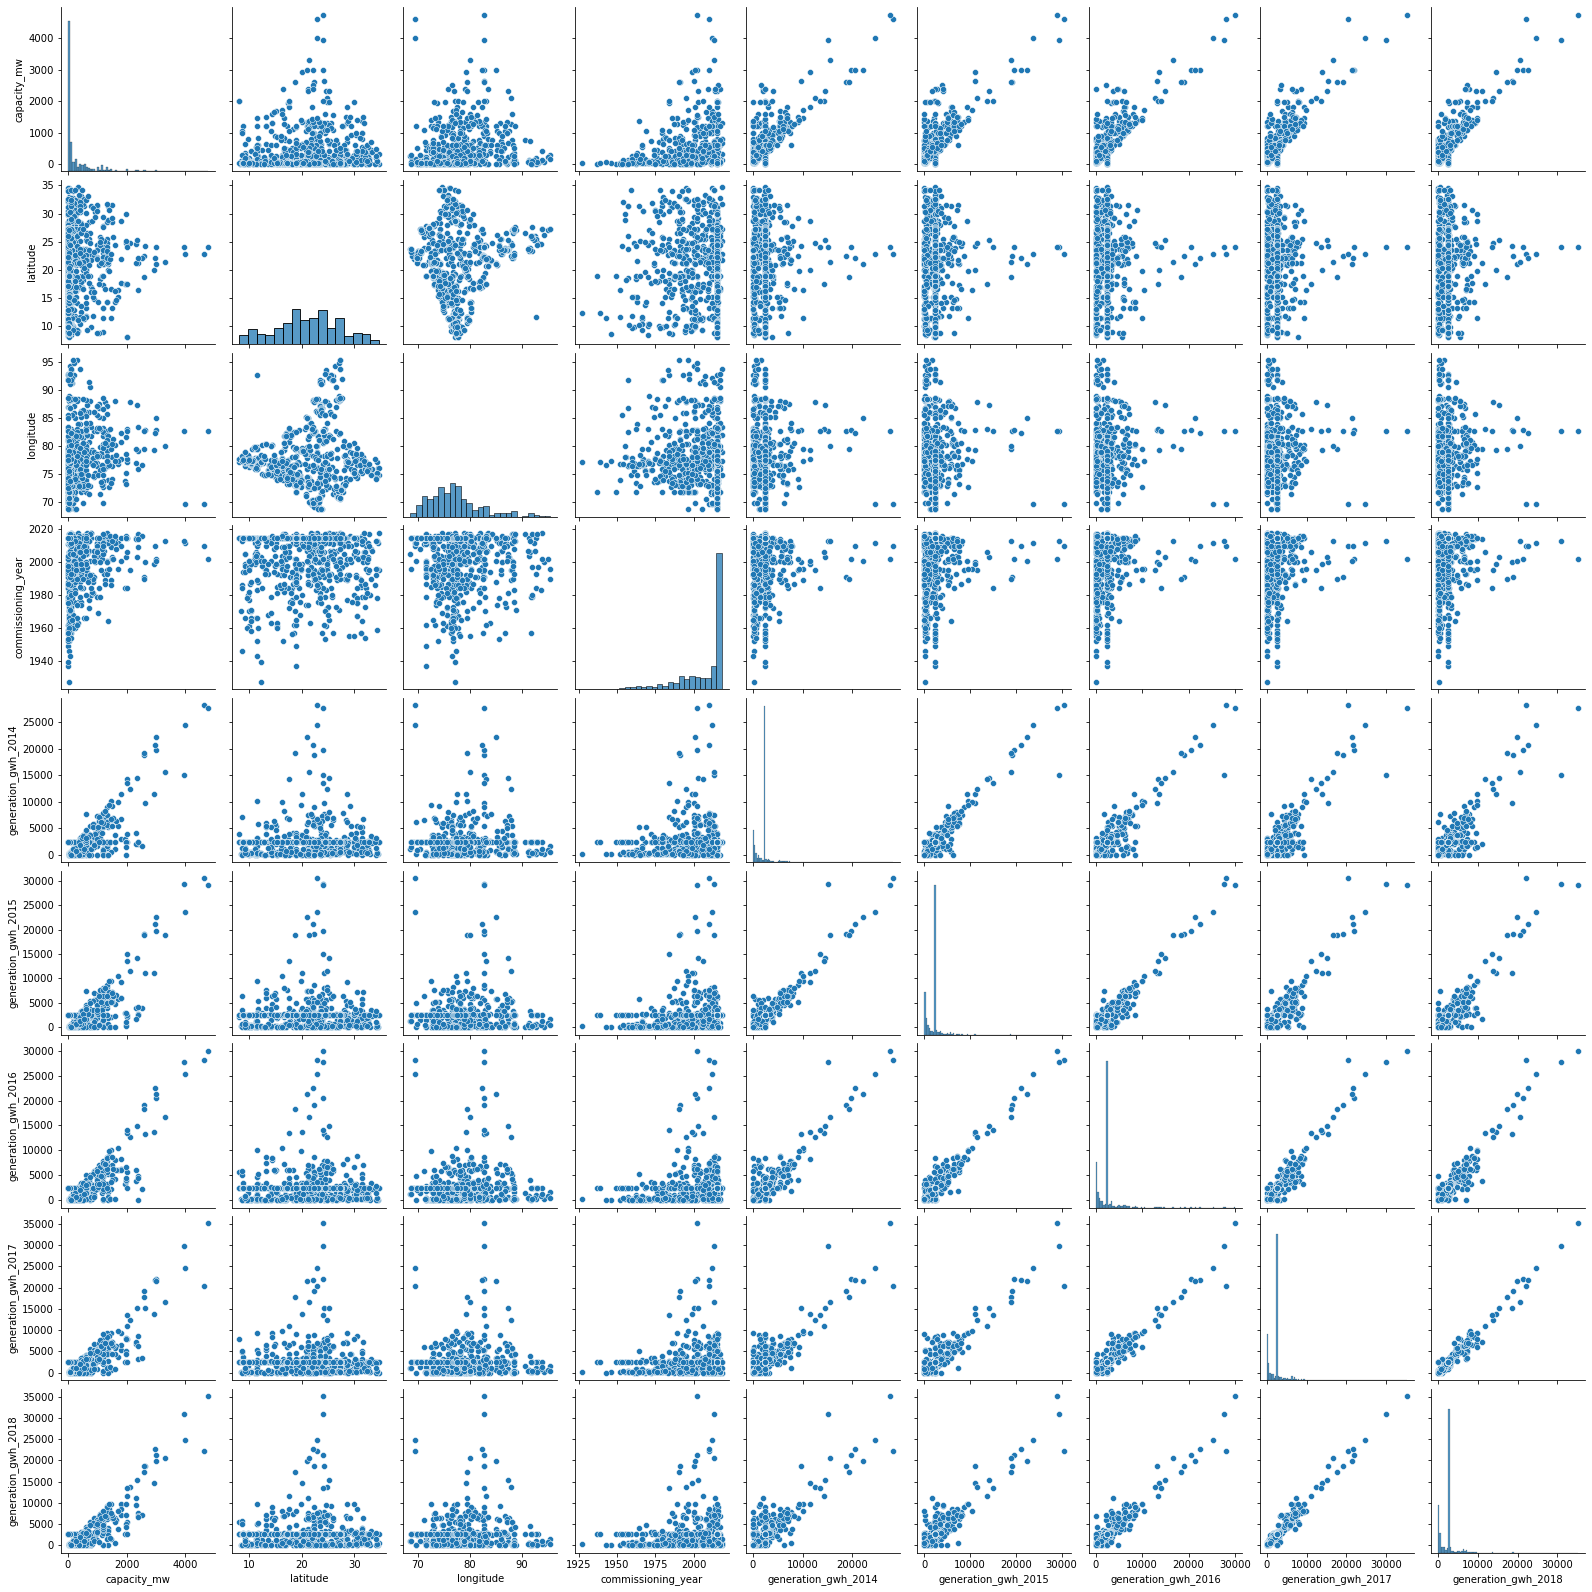

In [28]:
sns.pairplot(df)

In [29]:
df.dtypes

country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
geolocation_source         object
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['country_long','name','gppd_idnr','primary_fuel','other_fuel1','owner','source','geolocation_source','generation_data_source']
for i in lst:
    df[i]=le.fit_transform(df[i].astype(str))

### statical analysis

In [31]:
df

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,657,2.5,28.1839,73.2407,6,2,2011.0,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,0,1,519,98.0,24.7663,74.6090,1,2,2015.0,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,0,2,853,39.2,21.9038,69.3732,7,2,2015.0,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,0,3,0,135.0,23.8712,91.3602,2,2,2004.0,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,4,1,1800.0,21.9603,82.4091,1,2,2015.0,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,902,491,1600.0,16.2949,77.3568,1,2,2016.0,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,0,903,822,3.0,12.8932,78.1654,6,2,2015.0,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,0,904,891,25.5,15.2758,75.5811,7,2,2015.0,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,0,905,539,80.0,24.3500,73.7477,1,2,2015.0,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


In [32]:
df.describe()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0
mean,0.0,453.000000,453.000000,326.223755,21.086467,77.172109,3.206174,1.995590,2004.594267,56.169791,43.847850,1.733186,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
std,0.0,261.972645,261.972645,590.085456,6.098262,4.976401,2.280652,0.081259,15.734928,82.529116,44.642818,0.677151,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.0
min,0.0,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,226.500000,226.500000,16.725000,17.072000,73.811550,1.000000,2.000000,1998.000000,5.000000,22.000000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340,0.0
50%,0.0,453.000000,453.000000,59.200000,21.281800,76.493800,3.000000,2.000000,2014.000000,5.000000,22.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
75%,0.0,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,2.000000,2015.000000,95.500000,29.500000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
max,0.0,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

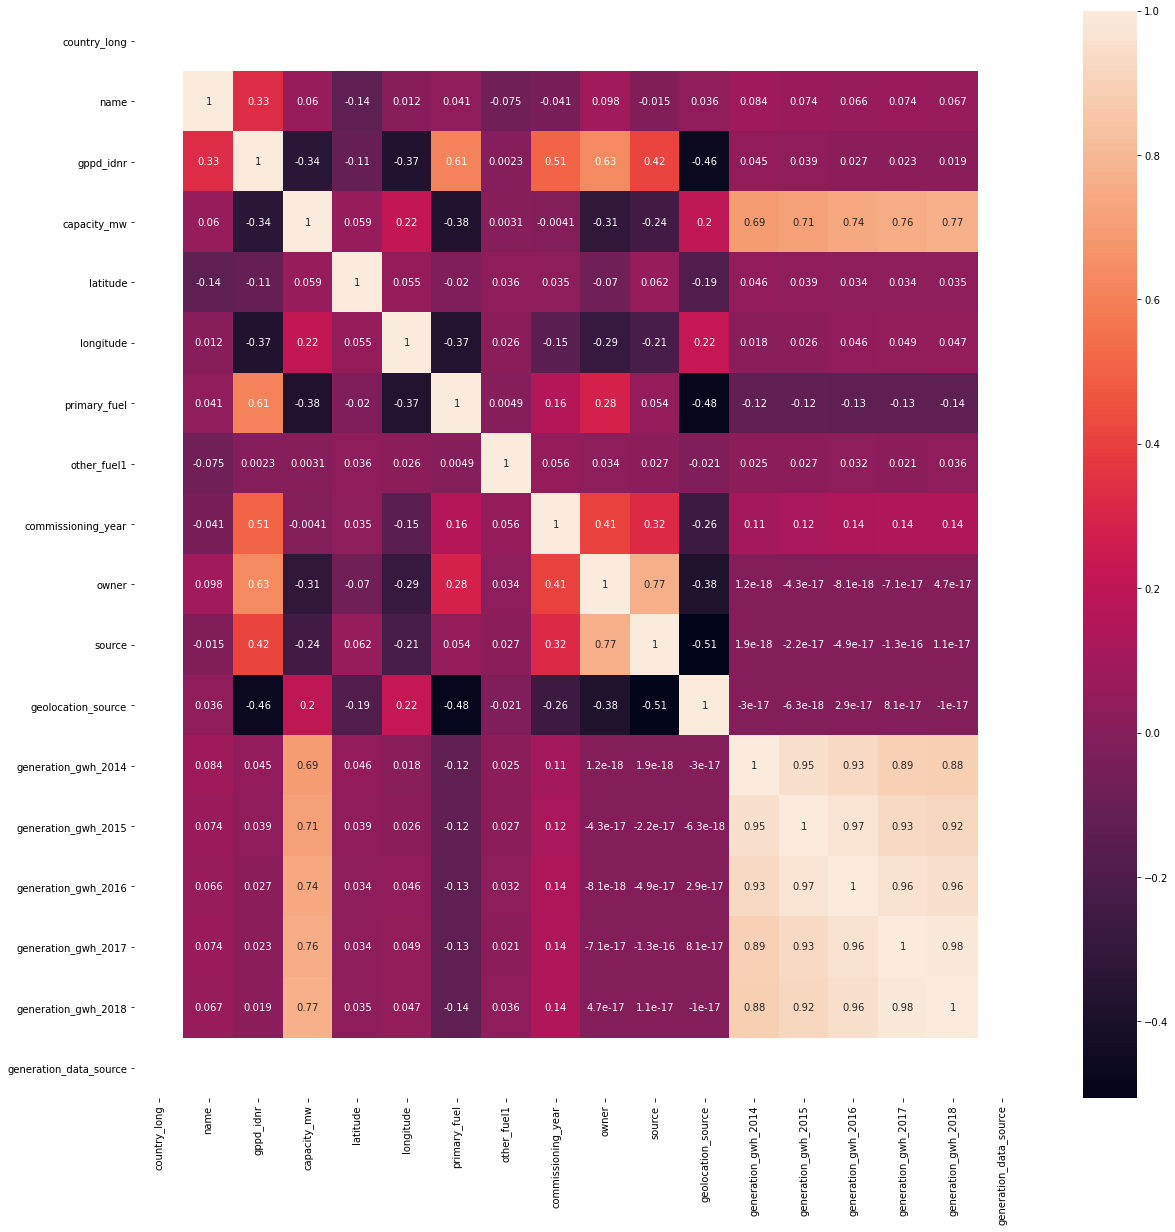

In [33]:
#checking corelation between the columns through heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show

In [34]:
df.corr()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,1.000000,0.332205,0.060240,-0.137256,0.011780,0.040753,-0.074663,-0.041465,9.807492e-02,-1.463951e-02,3.622452e-02,8.375890e-02,7.366460e-02,6.617668e-02,7.363387e-02,6.663814e-02,NaN
gppd_idnr,NaN,0.332205,1.000000,-0.335742,-0.107710,-0.372802,0.609180,0.002333,0.511350,6.305894e-01,4.163838e-01,-4.641741e-01,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02,NaN
capacity_mw,NaN,0.060240,-0.335742,1.000000,0.059041,0.215875,-0.380395,0.003105,-0.004072,-3.110481e-01,-2.421218e-01,2.048653e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,NaN
latitude,NaN,-0.137256,-0.107710,0.059041,1.000000,0.055202,-0.020203,0.035587,0.035355,-6.964446e-02,6.173837e-02,-1.909066e-01,4.624445e-02,3.872175e-02,3.378729e-02,3.448601e-02,3.454470e-02,NaN
longitude,NaN,0.011780,-0.372802,0.215875,0.055202,1.000000,-0.368766,0.026114,-0.150742,-2.871169e-01,-2.121658e-01,2.208121e-01,1.773269e-02,2.604610e-02,4.638023e-02,4.922108e-02,4.721134e-02,NaN
primary_fuel,NaN,0.040753,0.609180,-0.380395,-0.020203,-0.368766,1.000000,0.004912,0.164947,2.842958e-01,5.361263e-02,-4.832168e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01,NaN
other_fuel1,NaN,-0.074663,0.002333,0.003105,0.035587,0.026114,0.004912,1.000000,0.056437,3.368729e-02,2.658990e-02,-2.140831e-02,2.450509e-02,2.679006e-02,3.157459e-02,2.111693e-02,3.567517e-02,NaN
commissioning_year,NaN,-0.041465,0.511350,-0.004072,0.035355,-0.150742,0.164947,0.056437,1.000000,4.089166e-01,3.222222e-01,-2.599290e-01,1.100630e-01,1.218816e-01,1.411613e-01,1.413426e-01,1.442491e-01,NaN
owner,NaN,0.098075,0.630589,-0.311048,-0.069644,-0.287117,0.284296,0.033687,0.408917,1.000000e+00,7.695825e-01,-3.848377e-01,1.211927e-18,-4.253175e-17,-8.115062e-18,-7.069909e-17,4.713271e-17,NaN


### Removing outliers

In [35]:
#checking skewness
df.skew()

country_long               0.000000
name                       0.000000
gppd_idnr                  0.000000
capacity_mw                3.123576
latitude                  -0.095721
longitude                  1.130252
primary_fuel               0.472251
other_fuel1              -20.453120
commissioning_year        -1.714873
owner                      1.364406
source                     1.827373
geolocation_source        -2.159841
generation_gwh_2014        5.035446
generation_gwh_2015        5.364134
generation_gwh_2016        5.068427
generation_gwh_2017        5.110952
generation_gwh_2018        4.937907
generation_data_source     0.000000
dtype: float64

# 1) Primary Fuel 

In [36]:
x=df.drop("primary_fuel",axis=1)
y=df["primary_fuel"]

In [37]:
x.skew()

country_long               0.000000
name                       0.000000
gppd_idnr                  0.000000
capacity_mw                3.123576
latitude                  -0.095721
longitude                  1.130252
other_fuel1              -20.453120
commissioning_year        -1.714873
owner                      1.364406
source                     1.827373
geolocation_source        -2.159841
generation_gwh_2014        5.035446
generation_gwh_2015        5.364134
generation_gwh_2016        5.068427
generation_gwh_2017        5.110952
generation_gwh_2018        4.937907
generation_data_source     0.000000
dtype: float64

In [38]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

x=pd.DataFrame(x_new,columns=x.columns)

In [39]:
x.skew()

country_long               0.000000
name                      -0.288179
gppd_idnr                 -0.288179
capacity_mw                0.022164
latitude                  -0.069526
longitude                  0.040507
other_fuel1              -17.330022
commissioning_year        -1.077695
owner                      0.467077
source                    -0.214066
geolocation_source        -2.132728
generation_gwh_2014        0.123226
generation_gwh_2015        0.074582
generation_gwh_2016        0.041821
generation_gwh_2017        0.018337
generation_gwh_2018        0.000783
generation_data_source     0.000000
dtype: float64

In [40]:
x.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,-2.165615,0.790633,-1.695767,1.167829,-0.826778,0.057607,0.358184,1.490514,1.582861,-2.345400,0.287071,0.311796,0.315787,0.312925,0.321938,0.0
1,0.0,-2.146630,0.331335,0.193694,0.600871,-0.431721,0.057607,0.743571,1.512380,2.036658,0.396062,0.287071,0.311796,0.315787,0.312925,0.321938,0.0
2,0.0,-2.130340,1.397466,-0.292337,0.128413,-2.231266,0.057607,0.743571,-1.899629,-0.471879,0.396062,0.287071,0.311796,0.315787,0.312925,0.321938,0.0
3,0.0,-2.115584,-2.165615,0.360998,0.452885,2.106598,0.057607,-0.237119,-0.719375,-0.403248,0.396062,-0.864800,-0.579716,-0.542819,-0.750910,-0.771699,0.0
4,0.0,-2.101875,-2.146630,1.649503,0.137715,1.144189,0.057607,0.743571,-0.719375,-0.403248,0.396062,0.537628,1.385476,1.427655,1.180690,1.552482,0.0


In [41]:
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

In [42]:
x.shape

(907, 17)

In [43]:
y.shape

(907,)

In [44]:
y=y.values.reshape(-1,1)

In [45]:
y.shape

(907, 1)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on random state",maxRS)

Best accuracy is  0.8516483516483516 on random state 183


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=183,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(725, 17)
(725, 1)
(182, 17)
(182, 1)


In [49]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 85.16483516483517
[[ 8  1  0  0  0  0  0  1]
 [ 1 40  0  3  0  0  0  0]
 [ 0  3  5  4  0  0  0  0]
 [ 0  7  0 46  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 1  0  1  2  0  0  0  0]
 [ 0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.77      0.91      0.83        44
           2       0.83      0.42      0.56        12
           3       0.82      0.87      0.84        53
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       1.00      0.97      0.98        30
           7       0.93      1.00      0.96        27

    accuracy                           0.85       182
   macro avg       0.64      0.62      0.62       182
weighted avg       0.83      0.85      0.83       182



In [50]:
from sklearn.model_selection import cross_val_score

src=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression Model : ", src.mean())

Cross validation score of Logistic Regression Model :  0.7938376540586485


# 2) capacity_mw

In [51]:
df.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,657,2.5,28.1839,73.2407,6,2,2011.0,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,0,1,519,98.0,24.7663,74.6090,1,2,2015.0,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,0,2,853,39.2,21.9038,69.3732,7,2,2015.0,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,0,3,0,135.0,23.8712,91.3602,2,2,2004.0,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,4,1,1800.0,21.9603,82.4091,1,2,2015.0,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [53]:
x=df.drop("capacity_mw",axis=1)
y=df["capacity_mw"]

In [54]:
x.shape

(907, 17)

In [55]:
y.shape

(907,)

In [56]:
y=y.values.reshape(-1,1)

In [57]:
y.shape

(907, 1)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(725, 17)
(725, 1)
(182, 17)
(182, 1)


In [59]:
lm=LinearRegression()

In [60]:
lm.fit(x_train,y_train)

LinearRegression()

In [61]:
lm.score(x_train,y_train)

0.7832004550892322